<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr6_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadanie 6
Przeanalizuj przykład zamieszczony w pliku drzewa_decyzyjne_01a_s.r . Następnie dla zbioru iris
zbuduj drzewo decyzyjne klasyfikujące irysy na podstawie długości i szerokości płatków oraz
kielichów.  


Poczytałem trochę trochę w R jak wyglądają dane i wrzucam generację w Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)


Wczytuje dane i ustawiam data i target

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# --- Wczytanie danych ---
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

# --- Tworzenie tabeli z kolumnami danych i klasy ---
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df['species'] = df['target'].apply(lambda x: target_names[x])

# --- Wyświetlenie tabeli ---
print("\nPrzykładowe dane:")
print(df.head(10))



Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']

Przykładowe dane:
   sepal_length  sepal_width  petal_length  petal_width  target species
0           5.1          3.5           1.4          0.2       0  setosa
1           4.9          3.0           1.4          0.2       0  setosa
2           4.7          3.2           1.3          0.2       0  setosa
3           4.6          3.1           1.5          0.2       0  setosa
4           5.0          3.6           1.4          0.2       0  setosa
5           5.4          3.9           1.7          0.4       0  setosa
6           4.6          3.4           1.4          0.3       0  setosa
7           5.0          3.4           1.5          0.2       0  setosa
8           4.4          2.9           1.4          0.2       0  setosa
9           4.9          3.1           1.5          0.1      

In [9]:

print(raw_data.keys()) #drukuj wsadowa strukturę

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Buduje DataFrame

In [10]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Rozkład

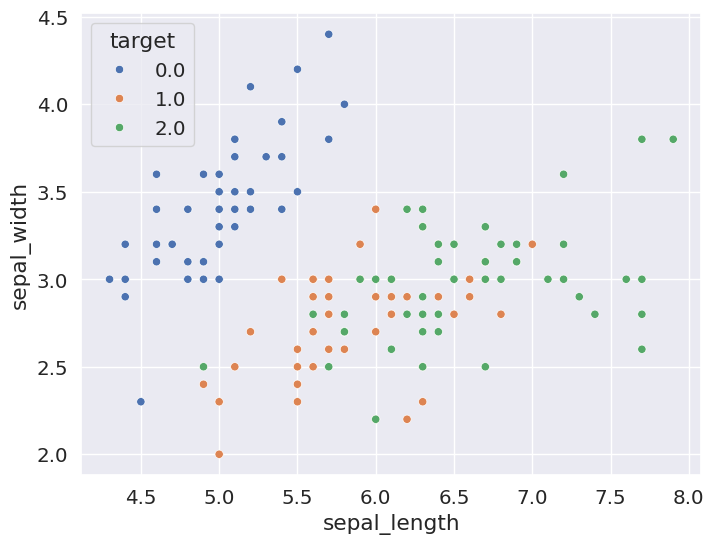

In [11]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])


In [12]:

df['target'].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


Dane i Target

In [26]:
data = df.copy()
data = data[['sepal_length', 'sepal_width','petal_length','petal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
target.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [16]:
#przypisz do budowy drzewa
data = data.values
target = target.values.astype('int16')

Budowa drzewa - poziom 1

In [24]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=4, random_state=42)

Dla depth 4 już się przeuczyło (dość duży zbiór testowy dałem)

Accuracy: 1.0

Raport klasyfikacji:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        23
         2.0       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



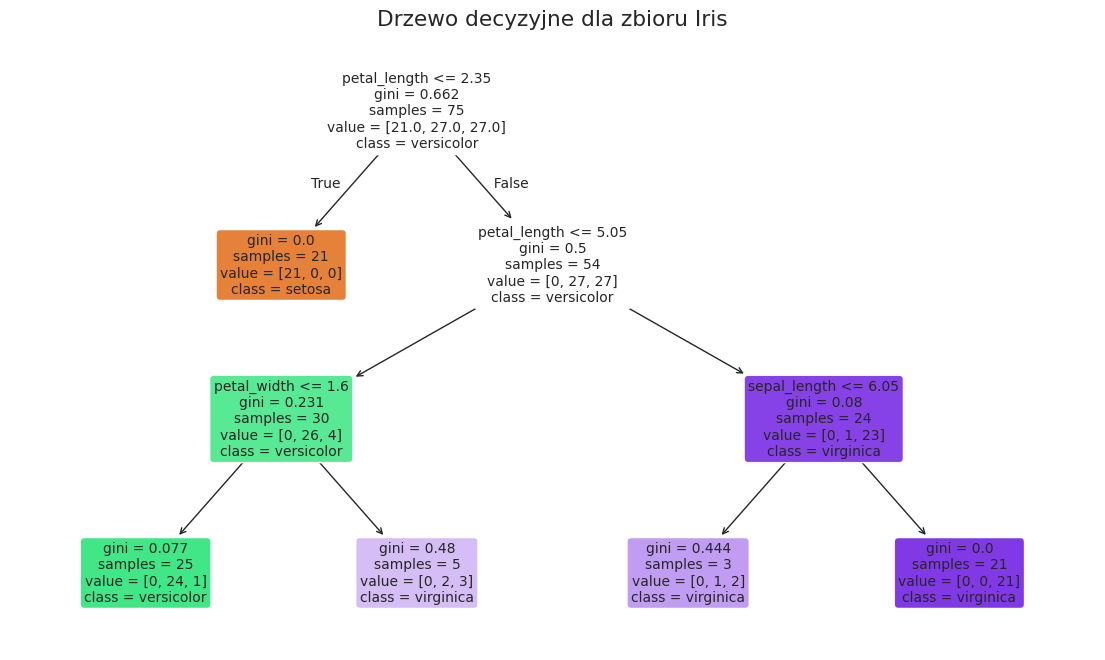

In [34]:
# === Import bibliotek ===
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === Podział na zbiory treningowy i testowy ===
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42
)

# ===Utworzenie i trenowanie drzewa decyzyjnego ===
clf = DecisionTreeClassifier(
    criterion='gini',   # ew. 'gini'
    max_depth=3,           # dobrać
    random_state=42
)
clf.fit(X_train, y_train)

# === Ocena modelu ===
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

# === Wizualizacja drzewa ===
plt.figure(figsize=(14, 8))
plot_tree(clf,
          feature_names=feature_names, # Corrected: use the 'feature_names' list
          class_names=['setosa', 'versicolor', 'virginica'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Drzewo decyzyjne dla zbioru Iris")
plt.show()

Klasyfikacja

In [41]:
import numpy as np
import pandas as pd

# mapowanie klas
class_names = np.array(['setosa', 'versicolor', 'virginica'])

def predict_flower(model, sepal_length, sepal_width, petal_length, petal_width):
    X = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    proba = model.predict_proba(X)[0]
    pred_idx = np.argmax(proba)
    return class_names[pred_idx], proba

#Pojedynczy zestaw z polecenia =====
sample = dict(
    sepal_length=8.1,
    sepal_width=2.5,
    petal_length=3.1,
    petal_width=2.3
    )
label, proba = predict_flower(clf, **sample)
print("Wejście:", sample)
print("Przewidywana klasa:", label)
print("Prawdopodobieństwa [setosa, versicolor, virginica]:", np.round(proba, 4))

#ilka zestawów na raz (batch)
batch = [
    dict(sepal_length=8.1, sepal_width=2.5, petal_length=3.1, petal_width=2.3),  # z zadania
    dict(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2),  # typowa setosa
    dict(sepal_length=6.0, sepal_width=2.9, petal_length=4.5, petal_width=1.5),  # typowy versicolor
    dict(sepal_length=6.8, sepal_width=3.0, petal_length=5.5, petal_width=2.1),  # typowa virginica
]

Xb = pd.DataFrame(batch)[['sepal_length','sepal_width','petal_length','petal_width']]
Pb = clf.predict_proba(Xb)
pred_idx = np.argmax(Pb, axis=1)

out = pd.DataFrame(batch)
out['predicted'] = class_names[pred_idx]
out[['P_setosa','P_versicolor','P_virginica']] = np.round(Pb, 4)
print("\nBatch – wyniki:")
print(out)


Wejście: {'sepal_length': 8.1, 'sepal_width': 2.5, 'petal_length': 3.1, 'petal_width': 2.3}
Przewidywana klasa: virginica
Prawdopodobieństwa [setosa, versicolor, virginica]: [0.  0.4 0.6]

Batch – wyniki:
   sepal_length  sepal_width  petal_length  petal_width   predicted  P_setosa  \
0           8.1          2.5           3.1          2.3   virginica       0.0   
1           5.0          3.6           1.4          0.2      setosa       1.0   
2           6.0          2.9           4.5          1.5  versicolor       0.0   
3           6.8          3.0           5.5          2.1   virginica       0.0   

   P_versicolor  P_virginica  
0          0.40         0.60  
1          0.00         0.00  
2          0.96         0.04  
3          0.00         1.00  


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
